In [28]:
# analysis the mask distribution of dataset.
from __future__ import print_function, absolute_import

import os 
import torch
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torchvision
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import sys, math
sys.path.append('..')

import scripts.utils
from scripts.utils.logger import Logger, savefig
from scripts.utils.evaluation import accuracy, AverageMeter, final_preds
from scripts.utils.misc import save_checkpoint, save_pred, adjust_learning_rate
from scripts.utils.osutils import mkdir_p, isfile, isdir, join
from scripts.utils.imutils import batch_with_heatmap,normalize_batch,im_to_numpy
from scripts.utils.transforms import fliplr, flip_back
import scripts.models as models
import scripts.datasets as datasets
import random
from matplotlib import cm

dataset_name= 'val2017'
dataroot = '/home/oishii/Documents/coco_data_maker/synthesis_coco_v4/'

class objectview(object):
    def __init__(self, *args, **kwargs):
        d = dict(*args, **kwargs)
        self.__dict__ = d
        
data_config  = objectview({'input_size':256,'normalized_input':False,'data_augumentation':False,'withseg':False})

val_loader = torch.utils.data.DataLoader(datasets.COCO(dataroot,dataset_name,config=data_config,sample=[],gan_norm=True),
                                                 batch_size=1, shuffle=False,
                                                 num_workers=2, pin_memory=False)

# analysis the differnce between the input and target
# analysis the mask distribution.
arr_diff = []
arr_prec = []
for i, (inputs, target) in enumerate(val_loader):            
            
    inputsnp = im_to_numpy(inputs[0,0:3])
    targetnp = im_to_numpy(target[0][0])
    masknp = im_to_numpy(inputs[0,3:4].repeat(3,1,1))
    diff = np.sum((inputsnp - targetnp)**2)/np.sum(masknp)
    arr_diff.append(diff)
    arr_prec.append(np.sum(masknp)/(masknp.shape[0]*masknp.shape[1])/3)

            

total Dataset of val2017 is :  1716


(array([  3.,  16.,  49.,  68., 103., 122., 127., 138., 117., 113.,  94.,
        109.,  96.,  80.,  91.,  83.,  51.,  55.,  50.,  39.,  37.,  22.,
         16.,  11.,   5.,   7.,   2.,   4.,   3.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.10406248, 0.28001468, 0.45596688, 0.63191908, 0.80787127,
        0.98382347, 1.15977567, 1.33572787, 1.51168007, 1.68763226,
        1.86358446, 2.03953666, 2.21548886, 2.39144106, 2.56739325,
        2.74334545, 2.91929765, 3.09524985, 3.27120205, 3.44715424,
        3.62310644, 3.79905864, 3.97501084, 4.15096304, 4.32691523,
        4.50286743, 4.67881963, 4.85477183, 5.03072403, 5.20667622,
        5.38262842, 5.55858062, 5.73453282, 5.91048502, 6.08643721,
        6.26238941, 6.43834161, 6.61429381, 6.79024601, 6.9661982 ,
        7.1421504 ]),
 <a list of 40 Patch objects>)

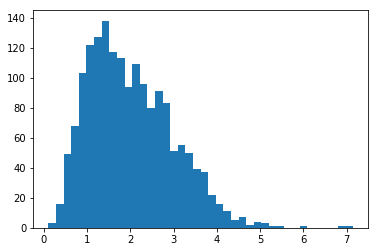

In [31]:
plt.hist(arr_diff,40)

In [26]:
masknp.shape

(256, 256, 3)

In [12]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def get_jet():
    colormap_int = np.zeros((256, 3), np.uint8)
 
    for i in range(0, 256, 1):
        colormap_int[i, 0] = np.int_(np.round(cm.jet(i)[0] * 255.0))
        colormap_int[i, 1] = np.int_(np.round(cm.jet(i)[1] * 255.0))
        colormap_int[i, 2] = np.int_(np.round(cm.jet(i)[2] * 255.0))

    return colormap_int

jet_map = get_jet()


Image.fromarray(np.array(jet_map).reshape(256,1,3).repeat(10,axis=1)).save('colormap.png')

# plt.imshow()
# plt.axis('off')
# plt.draw()
# def clamp(num, min_value, max_value):
#     return max(min(num, max_value), min_value)

# def gray2color(gray_array, color_map):
    
#     rows, cols = gray_array.shape
#     color_array = np.zeros((rows, cols, 3), np.uint8)
 
#     for i in range(0, rows):
#         for j in range(0, cols):
# #             log(256,2) = 8 , log(1,2) = 0 * 8
#             color_array[i, j] = color_map[clamp(int(abs(gray_array[i, j])*10),0,255)]
    
#     return color_array

